# Clasificación binaria por RNAs
* Francisco Josse Roja Rojas
* Yeira Liseth Rodríguez Rodríguez

A continuación se presenta el primer ejercicio del capítulo 5 de la materia de Inteligencia Artificial y mini-robots.

Para el desarrollo de este problema se tomo el archivo de

```
cancer1.xml
```
que se encontraba dentro de los proyectos, en la sección de clasificación binaria, en el programa de Multi Expression Programming X.


In [1]:
import pandas as pd
import xml.etree.ElementTree as ET

#### 1. Cargar y preparar los datos
Este archivo contiene datos donde cada fila tiene 10 características numéricas y un valor de clase (0 o 1). Para convertirlo del archivo XML está estructurado para el software de MEP a un DataFrame se extraen las filas desde la sección `<training>` y se convierten los datos a un DataFrame de Pandas. Luego se separan las características (X) de las etiquetas de clase (y)

In [2]:
tree = ET.parse('/content/cancer1.xml')
root = tree.getroot()
rows = []
for row in root.findall(".//training/data/row"):
    values = list(map(float, row.text.strip().split()))
    rows.append(values)
df = pd.DataFrame(rows)
X = df.iloc[:, :-1]  # columnas 0 a 8
y = df.iloc[:, -1]   # última columna es la etiqueta


#### 2. Dividir los datos y normalizalos
Se normalizan los datos para que la red neuronal converge más rápido y con más estabilidad si los datos están escalados. Esto evita que entradas con mayor magnitud dominen el aprendizaje.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Normalizar los datos con media 0 y desviación estándar 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 3. Arquitectura de la red neuronal
Explicación de la arquitectura:

* Dense(16, activation='relu'): 16 neuronas con activación ReLU.

* Dense(8, activation='relu'): otra capa oculta con 8 neuronas.

* Dense(1, activation='sigmoid'): una única neurona que da una salida entre 0 y 1 para clasificación binaria.*

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir una red neuronal simple de 2 capas ocultas
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # primera capa oculta
    Dense(8, activation='relu'),                                     # segunda capa oculta
    Dense(1, activation='sigmoid')                                   # salida binaria
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 4. Compilar el modelo
Se usa:
* `adam`: un optimizador eficiente y robusto.

* `binary_crossentrop`y: función de pérdida adecuada para clasificación binaria.

* `accuracy`: métrica que se mostrará durante el entrenamiento.

In [5]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#### 5. Entrenar la red neuronal
Se entrena la red usando `fit()`. Además de entrenar, se guarda el historial `(history)` que usaremos para graficar.


In [6]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,   # 20% del entrenamiento se usa para validación interna
    epochs=100,             # número de iteraciones completas sobre los datos
    batch_size=16,          # cuántos ejemplos procesa por vez
    verbose=1               # muestra la barra de progreso
)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9095 - loss: 0.5764 - val_accuracy: 1.0000 - val_loss: 0.5057
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9298 - loss: 0.5208 - val_accuracy: 1.0000 - val_loss: 0.4508
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9427 - loss: 0.4714 - val_accuracy: 1.0000 - val_loss: 0.3985
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9683 - loss: 0.4083 - val_accuracy: 1.0000 - val_loss: 0.3481
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9389 - loss: 0.3590 - val_accuracy: 1.0000 - val_loss: 0.3017
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9603 - loss: 0.3197 - val_accuracy: 1.0000 - val_loss: 0.2566
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9550 - loss: 0.2748 - val_accuracy: 1.0000 - val_loss: 0.2171
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9253 - loss: 0.2691 - val_accuracy: 1.000

#### 6. Visualizar la curva de aprendizaje


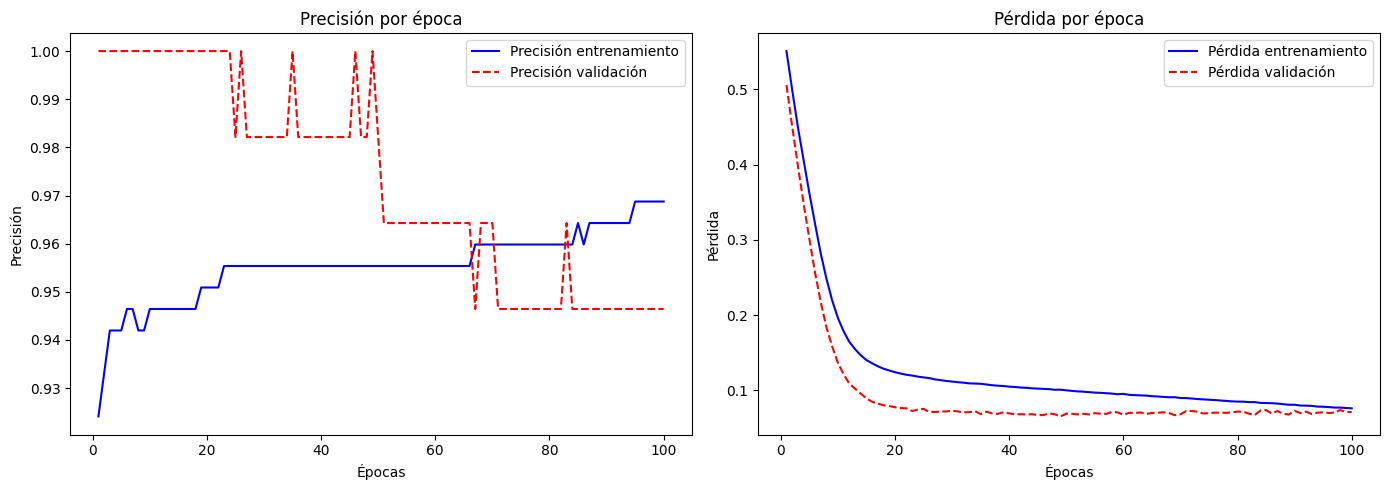

In [7]:
import matplotlib.pyplot as plt

# Extraer datos del historial
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Crear figura con dos subgráficos
plt.figure(figsize=(14, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Precisión entrenamiento')
plt.plot(epochs, val_acc, 'r--', label='Precisión validación')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Pérdida entrenamiento')
plt.plot(epochs, val_loss, 'r--', label='Pérdida validación')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


#### 7. Evaluar el modelo en el conjunto de prueba
Esto nos da la efectividad real del modelo con nuevos datos.

In [8]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n🔎 Precisión en conjunto de prueba: {acc * 100:.2f}%")


🔎 Precisión en conjunto de prueba: 94.29%


#### 8. Hacer predicciones y comparar con valores reales
Esto permite ver cómo se comporta el modelo individualmente.

In [10]:
for i in range(5):
    xi = X_test[i:i+1]
    yi = int(y_test.iloc[i])
    pred = int(model.predict(xi)[0][0] > 0.5)  # Clasifica como 0 o 1 según umbral
    print(f"Muestra {i}: Real = {yi}, Predicción = {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Muestra 0: Real = 1, Predicción = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Muestra 1: Real = 1, Predicción = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Muestra 2: Real = 1, Predicción = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Muestra 3: Real = 0, Predicción = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Muestra 4: Real = 1, Predicción = 1


Finalmente, se puede decir que la red neuronal ha logrado aprender correctamente el patrón de clasificación, generaliza bien sobre datos no vistos y no muestra signos de sobreajuste.